<a href="https://colab.research.google.com/github/Tanveer132/ML-Practices-End-to-End/blob/main/TimeSeriesAnalysis_Resampling_MovingAvg_Decomposition_Stationarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Resampling -

Resample is a “Convenient method for frequency conversion and resampling of time series”.

In practice, there are 2 main reasons why using resample.

    1. To inspect how data behaves differently under different resolutions or frequency.
    2. To join tables with different resolutions.

Two Types in Resampling :

1. Downsampling - 

    
    choose the aggregate function you’d like to implement. Options such as sum(), min(), max(), std(), mean(), etc. 
    In this case, we’ll just use sum() for the sake of example. Note that after resampling, your dataframe will use Datetime as index. 
    If that is not your intention, remember to reset the index at the end.

    df.resample(‘desired resolution(frequency)’).aggregate_function()

2. Upsampling -


    In some cases, you got the data with a resolution higher than you need. Upsampling can help you sort out this issue. 
    Instead of defining the aggregation function, we define the fillna method after resampling. 
    There are mainly 2 ways to fill na values: ffill(), or pad(), which are basically the same thing, 
    will assign the value of the previous data point,


In [1]:
#import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
#convert object type dates into datetime datatype
df=pd.read_csv('/content/Google_Stock_Price_Train.csv',parse_dates=['Date'],index_col="Date")
df

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,325.25,332.83,324.97,663.59,"7,380,500"
2012-01-04,331.27,333.87,329.08,666.45,"5,749,400"
2012-01-05,329.83,330.75,326.89,657.21,"6,590,300"
2012-01-06,328.34,328.77,323.68,648.24,"5,405,900"
2012-01-09,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...
2016-12-23,790.90,792.74,787.28,789.91,"623,400"
2016-12-27,790.68,797.86,787.66,791.55,"789,100"
2016-12-28,793.70,794.23,783.20,785.05,"1,153,800"


In [10]:
# get datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-01-03 to 2016-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   object 
 4   Volume  1258 non-null   object 
dtypes: float64(3), object(2)
memory usage: 59.0+ KB


In [11]:
#convert to float
df['Close'] = df['Close'].apply(lambda x: float(x.replace(",","")))
df['Volume'] = df['Volume'].apply(lambda x: float(x.replace(",","")))

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-01-03 to 2016-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   float64
 4   Volume  1258 non-null   float64
dtypes: float64(5)
memory usage: 59.0 KB


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0f1c4fed50>,
      dtype=object)

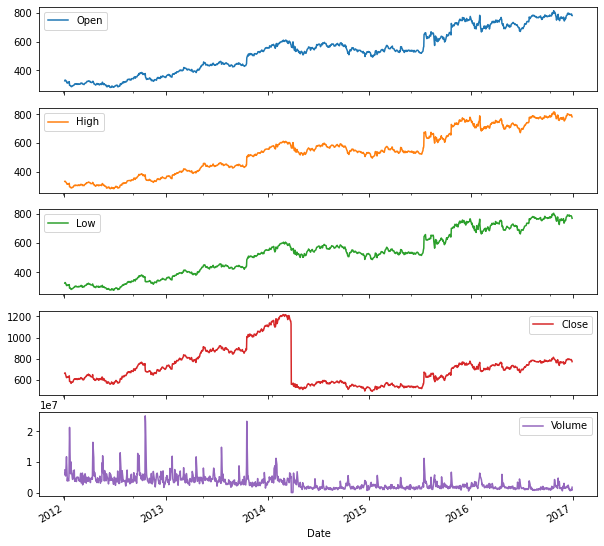

In [14]:
df.plot(subplots=True, figsize=(10,10))

In [16]:
# change frequency to month 
month=df.resample("M").mean()
month.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-31,307.354000,308.948000,303.780000,613.206500,7.391765e+06
2012-02-29,301.353000,303.621000,299.525000,604.736500,4.754110e+06
2012-03-31,312.104545,314.782273,309.808182,625.554545,4.318759e+06
2012-04-30,309.498500,311.969000,306.244000,617.734500,5.909735e+06
2012-05-31,301.883182,305.098636,298.618182,603.731818,5.353841e+06


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0f1c284bd0>,
      dtype=object)

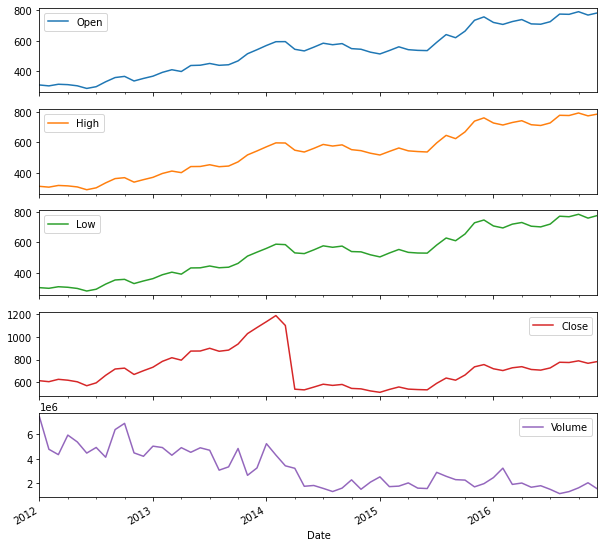

In [17]:
month.plot(subplots=True,figsize=(10,10))

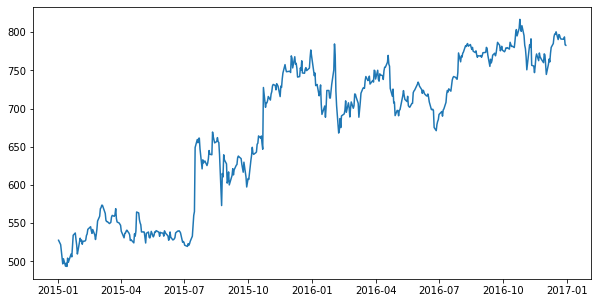

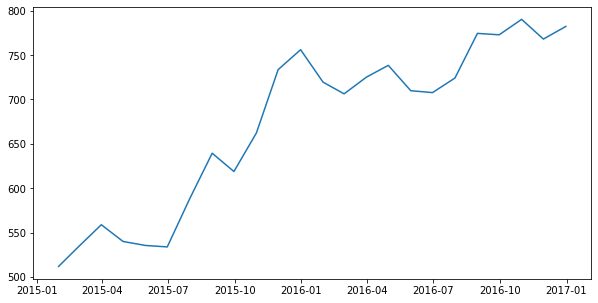

In [18]:
plt.figure(figsize=(10,5))
plt.plot(df.loc["2015":,"Open"])

plt.figure(figsize=(10,5))
plt.plot(month.loc["2015":,"Open"])

Conclusion :

    We can observe the behaviour of data at different frequencies.

In [19]:
#change frequency to year
year=df.resample("Y").mean()
year.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-12-31,320.195040,322.928080,317.288240,641.056960,5.228172e+06
2013-12-31,440.160119,443.407540,437.217500,881.821746,4.190346e+06
2014-12-31,560.709643,564.495198,555.162381,694.409008,2.487038e+06
2015-12-31,602.057341,607.442659,596.090714,602.005556,2.069231e+06
2016-12-31,743.732460,749.421667,737.597897,743.486706,1.832176e+06


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0f1a743f10>,
      dtype=object)

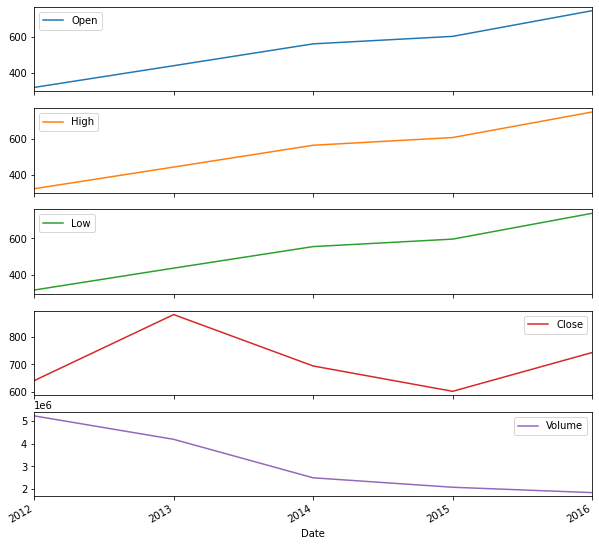

In [20]:
year.plot(subplots=True,figsize=(10,10))

#Moving Average -

The moving average is commonly used with time series to smooth random short-term variations and to highlight other components (trend, season, or cycle) present in your data. The moving average is also known as rolling mean and is calculated by averaging data of the time series within k periods of time. Moving averages are widely used in finance to determine trends in the market and in environmental engineering to evaluate standards for environmental quality such as the concentration of pollutants.

In general, the moving average smoothens the data. Moving average is a backbone to many algorithms, and one such algorithm is Autoregressive Integrated Moving Average Model (ARIMA), which uses moving averages to make time series data predictions.

Types of moving averages: 

    1. the simple moving average (SMA)
    2. the cumulative moving average (CMA)
    3. the exponential moving average (EMA). 

## Simple Moving Average (SMA) -

Simple Moving Average (SMA) uses a sliding window to take the average over a set number of time periods. It is an equally weighted mean of the previous n data.

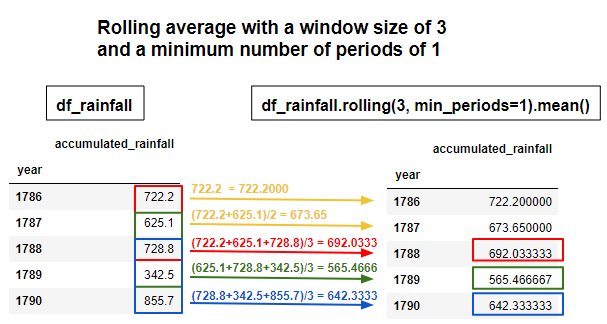

In [37]:
volume_data = pd.DataFrame(df.iloc[:,-1])
volume_data.head()

,Volume
Date,
2012-01-03,7380500.0
2012-01-04,5749400.0
2012-01-05,6590300.0
2012-01-06,5405900.0
2012-01-09,11688800.0


In [38]:
volume_data['SMA_3'] = volume_data["Volume"].rolling(window=3).mean()
volume_data['SMA_4'] = volume_data["Volume"].rolling(window=4).mean()
volume_data

# SMA3--->(7380500+5749400+6590300)/3 = 6573400

,Volume,SMA_3,SMA_4
Date,,,
2012-01-03,7380500.0,NaN,NaN
2012-01-04,5749400.0,NaN,NaN
2012-01-05,6590300.0,6.573400e+06,NaN
2012-01-06,5405900.0,5.915200e+06,6281525.0
2012-01-09,11688800.0,7.895000e+06,7358600.0
...,...,...,...
2016-12-23,623400.0,9.356333e+05,939475.0
2016-12-27,789100.0,7.949000e+05,899000.0
2016-12-28,1153800.0,8.554333e+05,884625.0


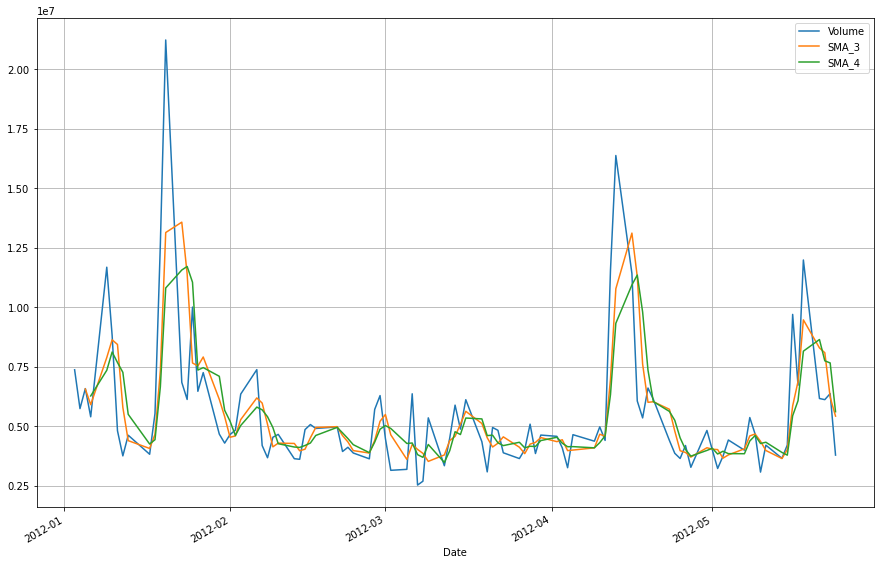

In [39]:
data = volume_data.head(100)

data.plot(grid=True ,figsize=(15,10))

##Comulative Moving Average(CMA) -

Unlike simple moving average which drops the oldest observation as the new one gets added, cumulative moving average considers all prior observations. CMA is not a very good technique for analyzing trends and smoothing out the data. The reason being, it averages out all of the previous data up until the current data point, so an equally weighted average of the sequence of n values.

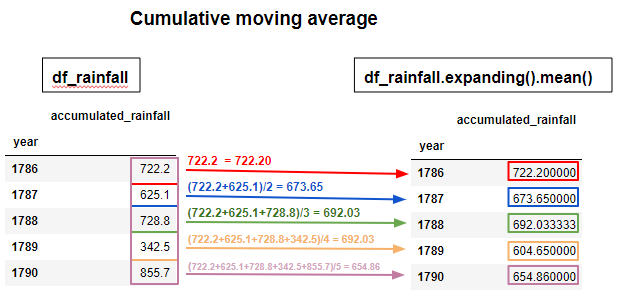

In [40]:
volume_data['CMA_4'] = volume_data["Volume"].expanding(min_periods=4).mean()
volume_data.head()

,Volume,SMA_3,SMA_4,CMA_4
Date,,,,
2012-01-03,7380500.0,NaN,NaN,NaN
2012-01-04,5749400.0,NaN,NaN,NaN
2012-01-05,6590300.0,6573400.0,NaN,NaN
2012-01-06,5405900.0,5915200.0,6281525.0,6281525.0
2012-01-09,11688800.0,7895000.0,7358600.0,7362980.0


In [41]:
data = volume_data.head(100)


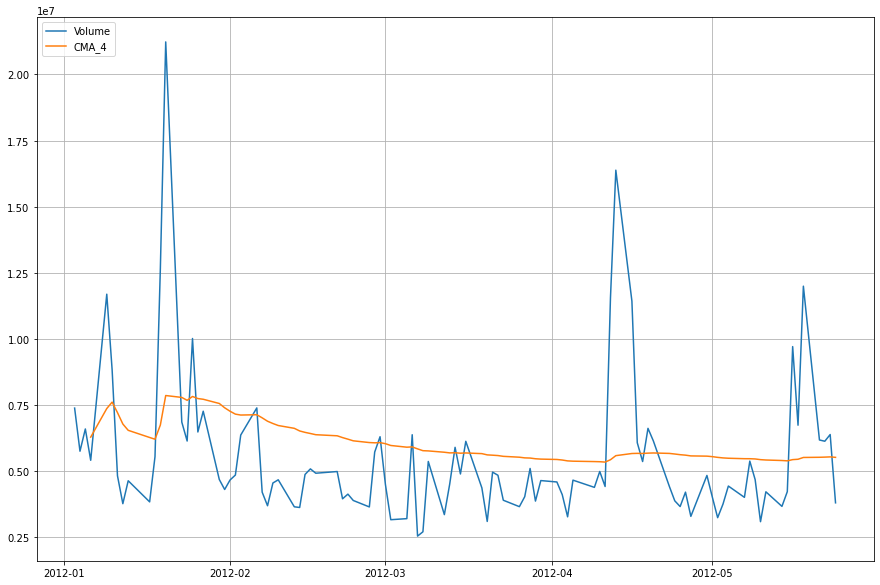

In [43]:
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(data['Volume'],label='Volume')
plt.plot(data['CMA_4'],label='CMA_4')
plt.legend(loc=2)

## Exponential Moving Average(EMA) -

Unlike SMA and CMA, exponential moving average gives more weight to the recent prices and as a result of which, it can be a better model or better capture the movement of the trend in a faster way. EMA's reaction is directly proportional to the pattern of the data.

Since EMAs give a higher weight on recent data than on older data, they are more responsive to the latest price changes as compared to SMAs, which makes the results from EMAs more timely and hence EMA is more preferred over other techniques.

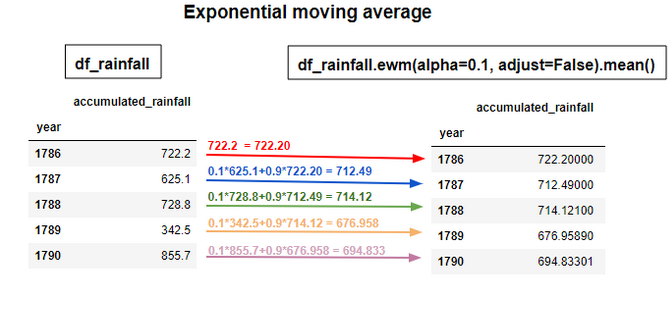

Divide by decaying adjustment factor in beginning periods to account for imbalance in relative weightings (viewing EWMA as a moving average).

    When adjust=True (default), the EW function is calculated using weights wi=(1−α)i

. For example, the EW moving average of the series [x0,x1,...,xt] would be:


    When adjust=False, the exponentially weighted function is calculated recursively

Exponential Moving Average (EMA) does a superb job in capturing the pattern of the data while the Cumulative Moving Average (CMA) lacks by a considerable margin.

In [44]:
volume_data['EMA'] = volume_data["Volume"].ewm(span=40,adjust=False).mean()
volume_data.head()

,Volume,SMA_3,SMA_4,CMA_4,EMA
Date,,,,,
2012-01-03,7380500.0,NaN,NaN,NaN,7.380500e+06
2012-01-04,5749400.0,NaN,NaN,NaN,7.300934e+06
2012-01-05,6590300.0,6573400.0,NaN,NaN,7.266269e+06
2012-01-06,5405900.0,5915200.0,6281525.0,6281525.0,7.175519e+06
2012-01-09,11688800.0,7895000.0,7358600.0,7362980.0,7.395679e+06


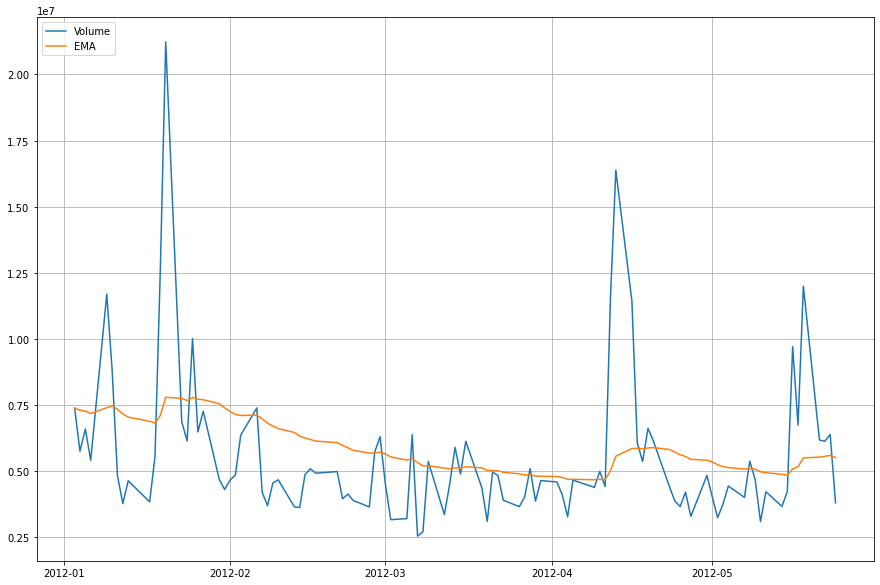

In [46]:
data = volume_data.head(100)

plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(data['Volume'],label='Volume')
plt.plot(data['EMA'],label='EMA')
plt.legend(loc=2)

#Decomposition

Time series decomposition is a technique that splits a time series into several components, each representing an underlying pattern category, trend, seasonality, and noise.

    Seasonality: describes the periodic signal in your time series.
    Trend: describes whether the time series is decreasing, constant, or increasing over time.
    Noise: describes what remains behind the separation of seasonality and trend from the time series.

In [59]:
from statsmodels.tsa.seasonal import seasonal_decompose

In seasonal_decompose we have to set the model. We can either set the model to be Additive or Multiplicative. A rule of thumb for selecting the right model is to see in our plot if the trend and seasonal variation are relatively constant over time, in other words, linear. If yes, then we will select the Additive model. Otherwise, if the trend and seasonal variation increase or decrease over time then we use the Multiplicative model.

In [79]:
decomposition = seasonal_decompose(x = data['Volume'], model = 'multiplicative',freq = 20)


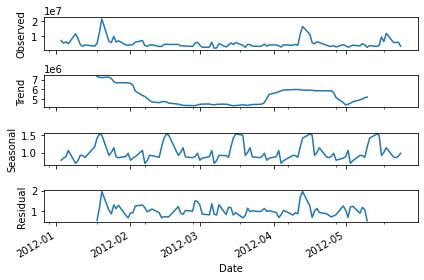

In [80]:
fig = decomposition.plot()

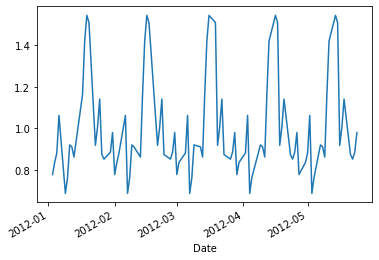

In [81]:
decomposition.seasonal.plot()

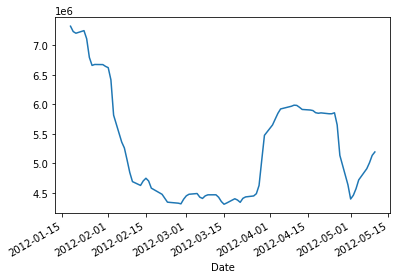

In [82]:
decomposition.trend.plot()

# Stationarity - 
 
Time series are stationary if they do not have trend or seasonal effects. Summary statistics calculated on the time series are consistent over time, like the mean or the variance of the observations.

Types in stationarity :


    1. Stationary Process: A process that generates a stationary series of observations.
    2. Stationary Model: A model that describes a stationary series of observations.
    3. Trend Stationary: A time series that does not exhibit a trend.
    4. Seasonal Stationary: A time series that does not exhibit seasonality.
    5. Strictly Stationary: A mathematical definition of a stationary process, specifically that 
      the joint distribution of observations is invariant to time shift.


Constant statistical properties -> mean, variance, std with does not change over time

**ADfuller test**

H0 : It is Non Stationary
    
H1 : It is Stationary

        
P value > 0.05 Fail to reject null hypothesis -> Non Stationary 


P value < 0.05 it is Stationary

In [83]:
from statsmodels.tsa.stattools import adfuller

In [84]:
output=adfuller(volume_data['Volume'])
p_val=output[1]

In [85]:
if p_val > 0.05:
  print("Non Stationary")
else :
  print("Stationary")

Stationary


If Concluded as Non-Stationary, Achieve stationarity by differencing

In [ ]:
# volume_data['Volume'] = volume_data['Volume'] - volume_data['Volume'].shift(1)
#OR
# volume_data['Volume'] = volume_data['Volume'].diff()